
# ĐỒ THỊ VÔ HƯỚNG ĐƠN



a. Đề bài: Vẽ đồ thị vô hướng đơn với: Đỉnh: {1, 2, 3, 4} — Cạnh: {(1,2), (1,3), (2,4)}

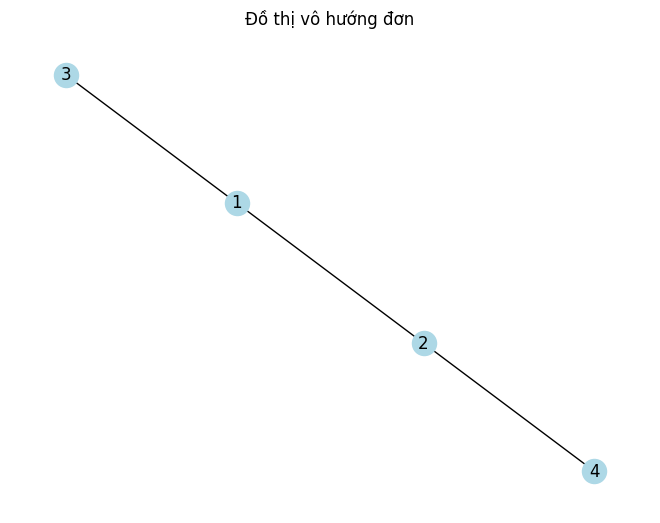

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4)])
nx.draw(G, with_labels=True, node_color='lightblue')
plt.title("Đồ thị vô hướng đơn")
plt.show()



b. Yêu cầu sinh viên sửa và lý giải

•	Thêm đỉnh 5 và cạnh 2–5 → Quan sát thay đổi liên thông

•	Xóa cạnh 1–2 → Có đỉnh nào cô lập không?

•	Thêm cạnh 3–4 → Có chu trình trực quan không?

•	Đếm bậc đỉnh bằng cách nhìn số cạnh nối


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(3,1), (1,2), (2,4)])

def draw_graph(G, title):
    pos = nx.spring_layout(G) 
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=14)
    nx.draw_networkx_edges(G, pos, width=2)
    plt.title(title)
    plt.show()

G1 = G.copy()
G1.add_edge(2,5)
draw_graph(G1, "Đồ thị sau khi thêm đỉnh 5 và cạnh 2-5")
print("Liên thông sau khi thêm đỉnh 5 và cạnh 2-5:",
      nx.is_connected(G1))

G2 = G1.copy()
G2.remove_edge(1,2)
draw_graph(G2, "Đồ thị sau khi xóa cạnh 1-2")
isolated = list(nx.isolates(G2))
print("Các đỉnh cô lập sau khi xóa cạnh 1-2:", isolated)

G3 = G1.copy()
G3.add_edge(3,4)
draw_graph(G3, "Đồ thị sau khi thêm cạnh 3-4 (xuất hiện chu trình?)")
cycles = list(nx.cycle_basis(G3))
print("Chu trình tìm được:", cycles)

print("Bậc của các đỉnh:")
for node, degree in G1.degree():
    print(f"Đỉnh {node}: bậc {degree}")


#ĐỒ THỊ CÓ HƯỚNG

a. Đề bài: Cho đồ thị có hướng. Đỉnh: {A, B, C, D} — Cạnh: (A→B), (A→C), (B→D), (C→D)

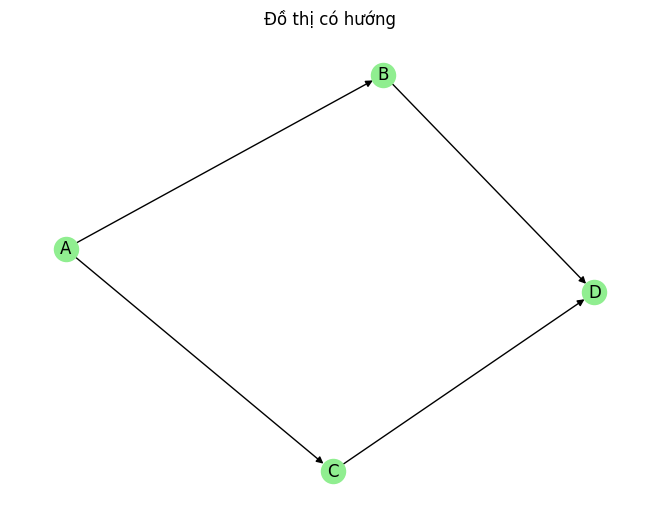

In [ ]:
G = nx.DiGraph()
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("C", "D")])
nx.draw(G, with_labels=True, node_color='lightgreen', arrows=True)
plt.title("Đồ thị có hướng")
plt.show()


b. Yêu cầu sinh viên sửa và lý giải

•	Thêm cạnh D→A → Kiểm tra đồ thị có chu trình không.

•	In G.successors("A") và G.predecessors("D") để phân tích đầu ra.

•	Đổi hướng cạnh (A→C) thành (C→A) → Quan sát lại sơ đồ.

•	Kiểm tra tính DAG bằng nx.is_directed_acyclic_graph(G).


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([("A","B"), ("A","C"), ("B","D"), ("C","D")])

def draw_graph(G, title):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightgreen",
            node_size=800, font_size=14, arrows=True, arrowsize=20)
    plt.title(title)
    plt.show()

draw_graph(G, "Đồ thị có hướng ban đầu")

G1 = G.copy()
G1.add_edge("D","A")
draw_graph(G1, "Sau khi thêm cạnh D→A")
print("Có chu trình không?", not nx.is_directed_acyclic_graph(G1))

print("Successors(A):", list(G.successors("A")))
print("Predecessors(D):", list(G.predecessors("D")))

G2 = G.copy()
if G2.has_edge("A","C"):
    G2.remove_edge("A","C")
    G2.add_edge("C","A")
draw_graph(G2, "Sau khi đổi hướng A→C thành C→A")

print("Đồ thị ban đầu là DAG?", nx.is_directed_acyclic_graph(G))
print("Sau khi thêm cạnh D→A là DAG?", nx.is_directed_acyclic_graph(G1))
print("Sau khi đổi hướng A→C thành C→A là DAG?", nx.is_directed_acyclic_graph(G2))


#ĐA ĐỒ THỊ


a. Đề bài: Vẽ đa đồ thị có Đỉnh: {1, 2, 3} — Cạnh: (1,2), (1,2), (2,3)

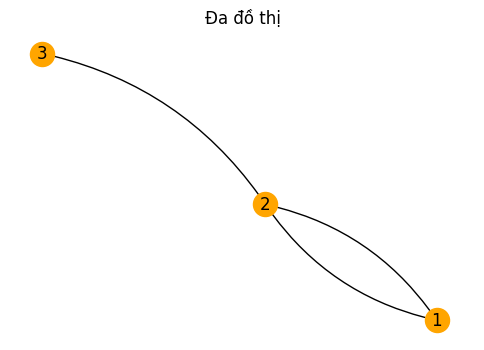

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiGraph()
G.add_edges_from([(1, 2), (1, 2), (2, 3)])
pos = nx.spring_layout(G)

plt.figure(figsize=(6, 4))
nx.draw_networkx_nodes(G, pos, node_color='orange')
nx.draw_networkx_labels(G, pos)

for i, (u, v, k) in enumerate(G.edges(keys=True)):
    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)],
        connectionstyle=f'arc3, rad={(0.2 if k % 2 == 0 else -0.2)}',
        edge_color='black'
    )

plt.title("Đa đồ thị")
plt.axis('off')
plt.show()


b. Yêu cầu sinh viên sửa và lý giải

•	Thêm cạnh thứ 3 giữa 1 và 2 → Quan sát số cạnh thực tế.

•	Đổi MultiGraph sang Graph và thử thêm cạnh trùng → Lỗi hay ghi đè?

•	Thêm cạnh khuyên tại đỉnh 2 → So sánh G.degree(2) trước và sau.

•	Tạo lại bằng DiGraph → Có còn là đa đồ thị không?


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiGraph()
G.add_edges_from([(1,2), (1,2), (2,3)])

def draw_graph(G, title):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="orange",
            node_size=800, font_size=14)
    nx.draw_networkx_edges(G, pos, width=2)
    plt.title(title)
    plt.show()

G.add_edge(1,2)
draw_graph(G, "MultiGraph sau khi thêm cạnh thứ 3 giữa 1 và 2")
print("Số cạnh thực tế giữa 1 và 2:", G.number_of_edges(1,2))

G_simple = nx.Graph()
G_simple.add_edges_from([(1,2), (1,2), (2,3)])
draw_graph(G_simple, "Graph (chỉ giữ 1 cạnh giữa 1 và 2)")
print("Số cạnh giữa 1 và 2 trong Graph:", G_simple.number_of_edges(1,2))

deg_before = G.degree(2)
G.add_edge(2,2)
deg_after = G.degree(2)
draw_graph(G, "MultiGraph sau khi thêm cạnh khuyên tại đỉnh 2")
print("Bậc đỉnh 2 trước:", deg_before)
print("Bậc đỉnh 2 sau:", deg_after)

DG = nx.DiGraph()
DG.add_edges_from([(1,2), (2,3), (2,2)])
draw_graph(DG, "DiGraph (không phải đa đồ thị)")
print("Loại đồ thị:", type(DG))
